In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
from sklearn.model_selection import train_test_split


import tensorflow as tf

%matplotlib inline

In [2]:
# Some constants  
DATA_PATH = '/home/upul/datasets/udacity/object-detection-crowdai/'
LABEL_FILE_NAME = 'labels.csv'

In [15]:
dataset = pd.read_csv(os.path.join(DATA_PATH, LABEL_FILE_NAME))
# printing some examples ....
dataset.head(5)

dataset['xmax_tmp'] = dataset['xmax']
dataset['ymin_tmp'] = dataset['ymin']

dataset['xmax'] = dataset['ymin_tmp']
dataset['ymin'] = dataset['xmax_tmp'] 

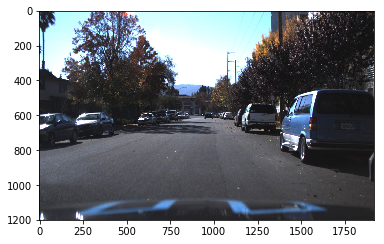

In [16]:
# lets plot some image frames ....
file_name = dataset['Frame'][100]
path = os.path.join(DATA_PATH, file_name)
img = plt.imread(path)
plt.imshow(img)
plt.show()

In [17]:
train, test = train_test_split(dataset, test_size=0.1, random_state=1024)
print('Number of images in train: {}'.format(len(train)))
print('Number of images in test: {}'.format(len(test)))

Number of images in train: 64857
Number of images in test: 7207


In [18]:
def get_all_bounding_boxes(data):
    bb_info = data[['Frame', 'xmin', 'xmax', 'ymin', 'ymax']]
    return bb_info

def get_bounding_box(data, frame_name):
    all_bb = get_all_bounding_boxes(data)
    return all_bb[all_bb['Frame'] == frame_name]

In [19]:
get_all_bounding_boxes(train).head(5)

,Frame,xmin,xmax,ymin,ymax
11171,1479499704555009984.jpg,331,488,541,652
33557,1479502621752928080.jpg,1037,1078,568,605
32123,1479502516747580680.jpg,477,552,562,601
50032,1479504397351651730.jpg,1483,1536,549,669
32404,1479502529246219992.jpg,134,258,526,620


In [20]:
selected_frame = get_bounding_box(train, '1479498371963069978.jpg')
selected_frame

,Frame,xmin,xmax,ymin,ymax
5,1479498371963069978.jpg,1726,1919,484,646
0,1479498371963069978.jpg,785,905,533,644
7,1479498371963069978.jpg,633,680,561,597
6,1479498371963069978.jpg,758,807,557,617
8,1479498371963069978.jpg,682,718,557,593
3,1479498371963069978.jpg,455,548,522,615
4,1479498371963069978.jpg,548,625,522,605
1,1479498371963069978.jpg,89,291,551,680
2,1479498371963069978.jpg,268,383,546,650


/home/upul/datasets/udacity/object-detection-crowdai/1479498371963069978.jpg
(1726, 484)
(785, 533)
(633, 561)
(758, 557)
(682, 557)
(455, 522)
(548, 522)
(89, 551)
(268, 546)
9


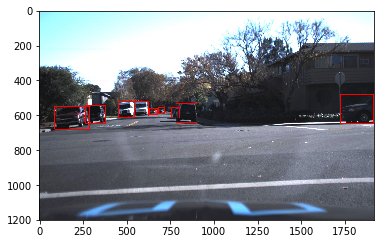

In [21]:
# this is just a debug function
def print_bounding_boxes(bb_frame):
    path = os.path.join(DATA_PATH, bb_frame['Frame'].unique()[0])
    print(path)
    image = plt.imread(path)
    
    for i in range(len(bb_frame)):
        row = bb_frame.iloc[i]
        top_left = (row['xmin'], row['ymin'])
        bot_right = (row['xmax'], row['ymax'])
        print(top_left)
        cv2.rectangle(image, bot_right, top_left , color = (255, 0, 0), thickness=3)
    plt.imshow(image)
    print(len(bb_frame))
    
print_bounding_boxes(selected_frame)